# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1 | vostok
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | pathein
Processing Record 7 of Set 1 | bunda
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | bonavista
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | nantucket
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | vaini
Processing

Processing Record 39 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 4 | rabo de peixe
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | lermontovka
Processing Record 45 of Set 4 | chunskiy
Processing Record 46 of Set 4 | lipari
Processing Record 47 of Set 4 | riyadh
Processing Record 48 of Set 4 | phangnga
Processing Record 49 of Set 4 | clarksburg
Processing Record 0 of Set 5 | kenai
Processing Record 1 of Set 5 | amahai
Processing Record 2 of Set 5 | fort nelson
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | zharkent
Processing Record 5 of Set 5 | ust-ilimsk
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | bengkulu
Processing Record 8 of Set 5 | tweed
Processing Record 9 of Set 5 | camacha
Processing Record 10 of Set 5 | nalut
Processing Record 11 of Set 5 | te anau
Processing Record 12 of Set 5

Processing Record 26 of Set 8 | trofors
Processing Record 27 of Set 8 | sabha
Processing Record 28 of Set 8 | chaoyang
Processing Record 29 of Set 8 | bremerton
Processing Record 30 of Set 8 | champerico
Processing Record 31 of Set 8 | tecoanapa
Processing Record 32 of Set 8 | rangia
Processing Record 33 of Set 8 | bongaree
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | mayumba
Processing Record 36 of Set 8 | northam
Processing Record 37 of Set 8 | behat
Processing Record 38 of Set 8 | menongue
Processing Record 39 of Set 8 | arica
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | newport
Processing Record 42 of Set 8 | omsukchan
Processing Record 43 of Set 8 | narasannapeta
Processing Record 44 of Set 8 | khash
Processing Record 45 of Set 8 | lasa
Processing Record 46 of Set 8 | kolosovka
Processing Record 47 of Set 8 | ilulissat
Processing Record 48 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 49 of Set 8 | ver

Processing Record 16 of Set 12 | havoysund
Processing Record 17 of Set 12 | kungurtug
Processing Record 18 of Set 12 | savalou
Processing Record 19 of Set 12 | xuddur
Processing Record 20 of Set 12 | bronnitsy
Processing Record 21 of Set 12 | marcona
City not found. Skipping...
Processing Record 22 of Set 12 | agua verde
Processing Record 23 of Set 12 | fort-shevchenko
Processing Record 24 of Set 12 | bolzano
Processing Record 25 of Set 12 | tessalit
Processing Record 26 of Set 12 | tura
Processing Record 27 of Set 12 | marystown
Processing Record 28 of Set 12 | lovozero
Processing Record 29 of Set 12 | tutoia
Processing Record 30 of Set 12 | aflu
City not found. Skipping...
Processing Record 31 of Set 12 | kirakira
Processing Record 32 of Set 12 | port lincoln
Processing Record 33 of Set 12 | sorland
Processing Record 34 of Set 12 | buala
Processing Record 35 of Set 12 | rio grande
Processing Record 36 of Set 12 | gubin
Processing Record 37 of Set 12 | baruun-urt
Processing Record 38 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,68.94,77,0,9.22,ZA,1679164181
1,faanui,-16.4833,-151.7500,82.44,77,100,14.70,PF,1679164182
2,vostok,46.4856,135.8833,15.04,92,86,6.11,RU,1679164183
3,barrow,71.2906,-156.7887,-20.18,69,0,11.50,US,1679164183
4,pathein,16.7833,94.7333,76.55,77,2,4.65,MM,1679164183


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,68.94,77,0,9.22,ZA,1679164181
1,faanui,-16.4833,-151.7500,82.44,77,100,14.70,PF,1679164182
2,vostok,46.4856,135.8833,15.04,92,86,6.11,RU,1679164183
3,barrow,71.2906,-156.7887,-20.18,69,0,11.50,US,1679164183
4,pathein,16.7833,94.7333,76.55,77,2,4.65,MM,1679164183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

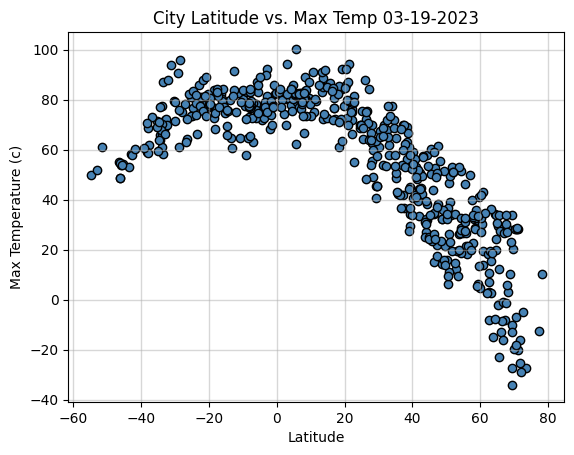

In [8]:
# Build scatter plot for latitude vs. temperature

today = time.strftime("%m-%d-%Y")
plt.figure(dpi=100)
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

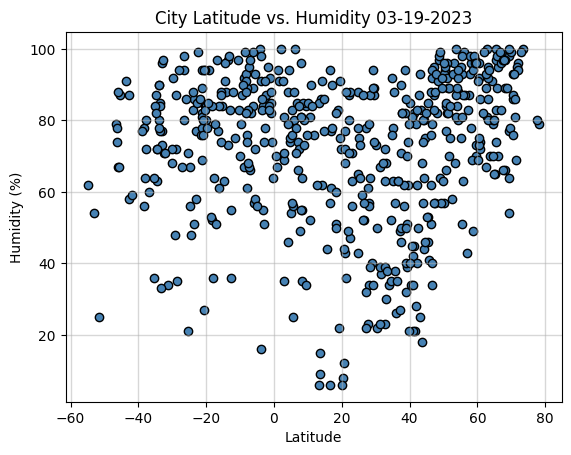

In [9]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m-%d-%Y")
plt.figure(dpi=100)
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

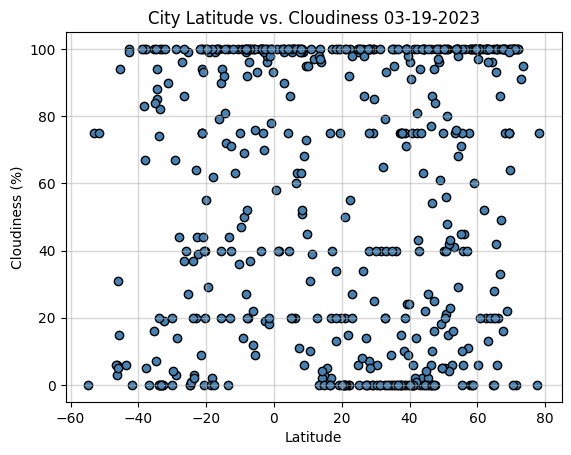

In [10]:
# Build the scatter plots for latitude vs. cloudiness
today = time.strftime("%m-%d-%Y")
plt.figure(dpi=100)
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

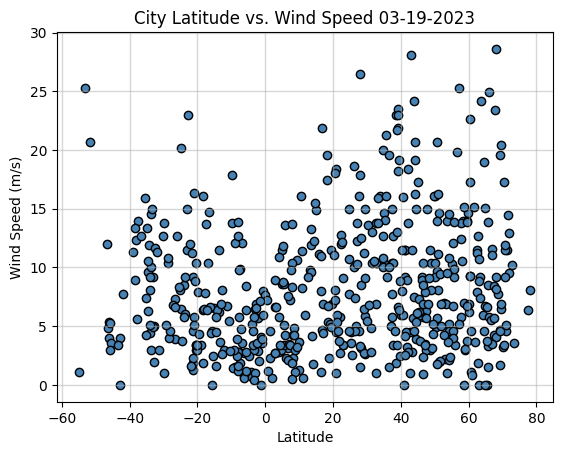

In [11]:
# Build the scatter plots for latitude vs. wind speed
today = time.strftime("%m-%d-%Y")
plt.figure(dpi=100)
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def make_plot(x,y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    print(f"The r-value is: {rvalue}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vostok,46.4856,135.8833,15.04,92,86,6.11,RU,1679164183
3,barrow,71.2906,-156.7887,-20.18,69,0,11.50,US,1679164183
4,pathein,16.7833,94.7333,76.55,77,2,4.65,MM,1679164183
6,tasiilaq,65.6145,-37.6368,12.36,74,42,3.33,GL,1679164184
7,lata,40.1629,-8.3327,58.91,85,96,5.99,PT,1679164184


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,68.94,77,0,9.22,ZA,1679164181
1,faanui,-16.4833,-151.7500,82.44,77,100,14.70,PF,1679164182
5,bunda,-2.0500,33.8667,68.20,85,96,5.73,TZ,1679164184
9,hermanus,-34.4187,19.2345,63.81,72,85,11.95,ZA,1679164185
15,avarua,-21.2078,-159.7750,80.65,89,75,4.61,CK,1679164190


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8826896485026945


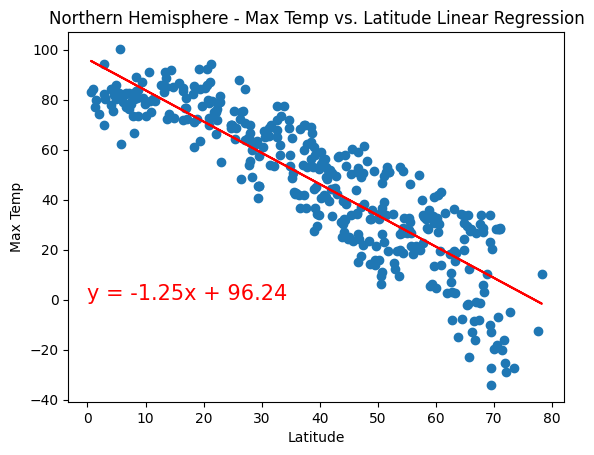

In [15]:
# Linear regression on Northern Hemisphere
# Call an function 
plt.figure(dpi=100)
equation = make_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Call an function 
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.572670538138174


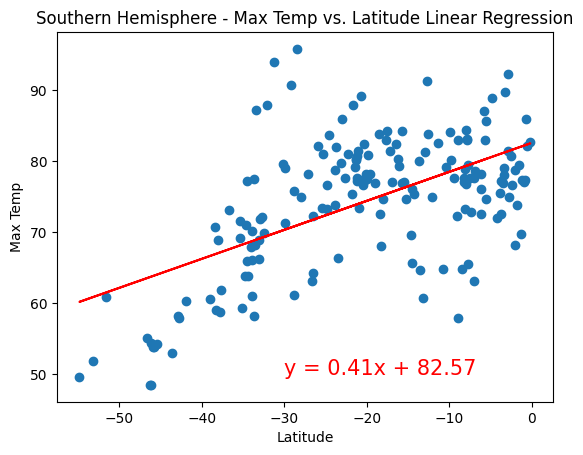

In [16]:
# Linear regression on Southern Hemisphere
plt.figure(dpi=100)
equation = make_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Call an function 
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 
1) There is a strong negative correlation between latitude and max temperature for northern hemisphere.

2) There is a moderate positive correlation between latitude and max temperature for southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32658712918976907


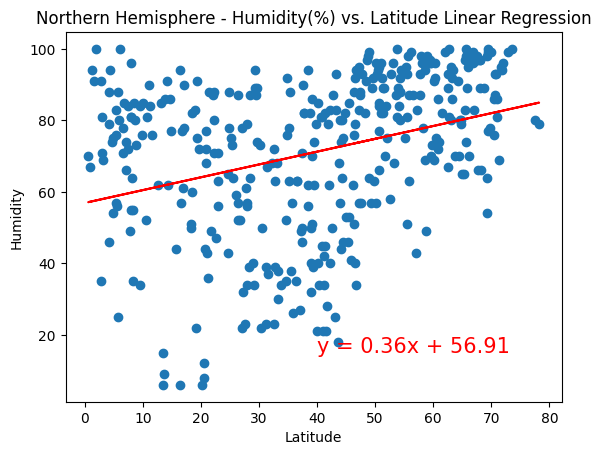

In [17]:
# Northern Hemisphere

# Call an function 
plt.figure(dpi=100)
equation = make_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Call an function 
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.20779116600659572


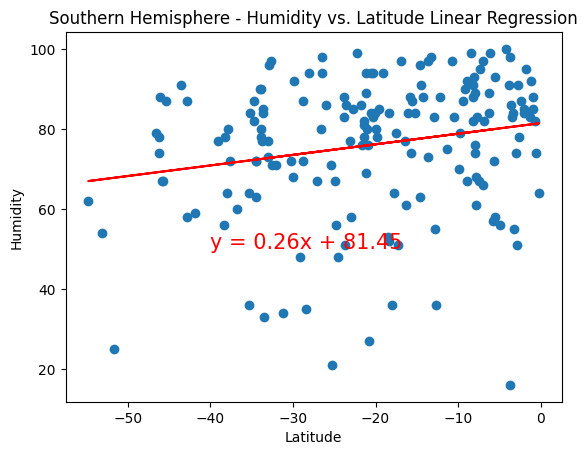

In [18]:
# Southern Hemisphere

plt.figure(dpi=100)
equation = make_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Call an function 
annotate(equation, -40, 50)

# Set a title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
1) There is a moderate positive correlation between latitude and humidity for northern hemisphere.

2) There is a moderate positive correlation between latitude and humidity for southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07444521094261464


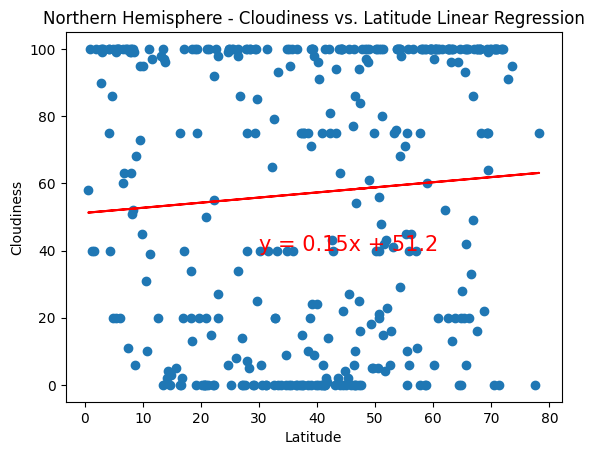

In [19]:
# Northern Hemisphere

# Call an function 
plt.figure(dpi=100)
equation = make_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Call an function 
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.31937140685774984


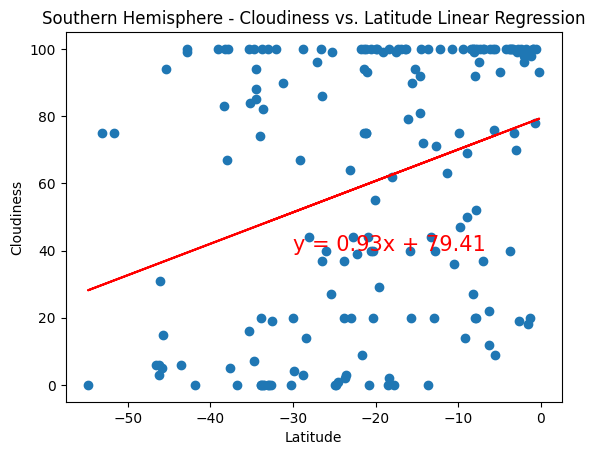

In [20]:
# Southern Hemisphere

plt.figure(dpi=100)
equation = make_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Call an function 
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 

1)There is a weak positive correlation between latitude and cloudiness for northern hemisphere.

2)There is a weak positive correlation between latitude and cloudiness for southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11574089145852481


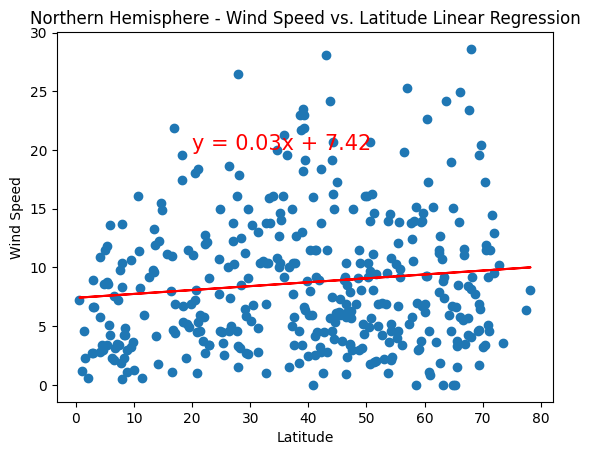

In [21]:
# Northern Hemisphere

# Call an function 
plt.figure(dpi=100)
equation = make_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Call an function 
annotate(equation, 20, 20)

# Set a title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.3163087783176588


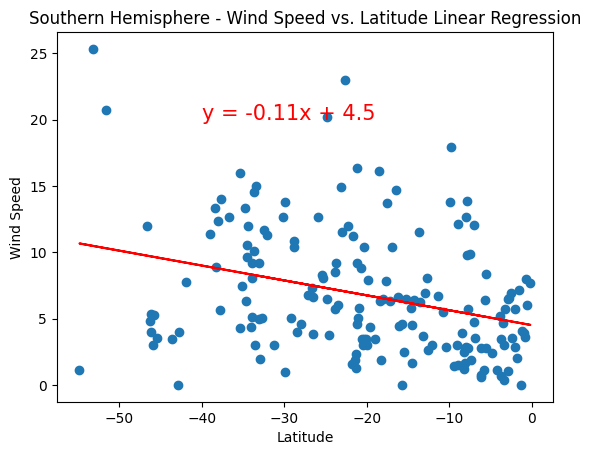

In [22]:
# Southern Hemisphere

plt.figure(dpi=100)
equation = make_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Call an function 
annotate(equation, -40, 20)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 

1)There is a weak positive correlation between latitude and windspeed for northern hemisphere.

2)There is a weak negative correlation between latitude and wind speed for southern hemisphere.